Python Code

1. Load and clean data, in-sample data (2018-2020) and out-of-sample data (2021). From the in-sample data, compute the classical Markowitz and resampled Markowitz frontiers.

a) Import necessary libraries and dataset, compute the matrix of monthly returns

In [1]:
# Install package
%pip install cvxpy
%pip install cvxopt

In [2]:
# Import library
import cvxpy as cp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load the in-sample and out-of-sample data.

In [3]:
# Load file into dateframe
monthlyClosing_inSample = 'monthly_closings_2018_to_2020.csv'
monthlyClosing_outSample = 'monthly_closings_2021.csv'

df1 = pd.read_csv(monthlyClosing_inSample) # in-sample data
df2 = pd.read_csv(monthlyClosing_outSample) # out-of-sample data

# in-sample data
df1

,Date,AMD,OXY,XLF,BABA,F,BAC,CCL,AMC,DAL,...,UNH,MMM,AAL,MULN,QQQ,AAPL,XLE,FXI,JPM,V
0,2018-01-01,13.740000,64.900764,27.397306,204.289993,9.464570,29.212917,65.913818,10.430466,53.549736,...,222.232788,218.483643,52.943863,7.32,164.870193,39.982342,60.957558,48.101372,102.605919,120.929955
1,2018-02-01,12.110000,56.789257,26.595846,186.139999,9.257274,29.304205,61.587685,12.223202,50.842533,...,212.265274,205.409531,52.875637,5.83,162.738815,42.535130,54.352787,43.124111,102.988831,119.674240
2,2018-03-01,10.050000,56.235203,25.398247,183.539993,9.667352,27.377983,60.756409,11.449066,51.999256,...,200.852341,192.592194,50.741047,6.96,155.848129,40.229286,54.898434,43.142376,98.057846,116.645149
3,2018-04-01,10.880000,67.682632,25.379751,178.539993,9.806952,27.416567,58.421768,14.404930,49.542076,...,222.610748,170.544785,41.922886,7.93,156.890533,39.625057,60.538544,42.859261,96.996758,123.724594
4,2018-05-01,13.730000,73.762344,25.130117,198.009995,10.212634,26.610199,57.699131,12.217362,51.278229,...,227.422699,173.036407,42.518581,6.71,165.790802,44.806568,62.351170,42.649212,95.902344,127.469086
5,2018-06-01,14.990000,73.306801,24.584606,185.529999,9.788214,25.936863,53.508331,13.125407,47.278862,...,231.029251,173.769394,37.156170,7.35,167.331055,44.555717,62.285557,39.242756,93.384048,129.363617
6,2018-07-01,18.330000,74.186356,25.953985,187.229996,8.877476,28.411858,55.310310,13.641843,51.936115,...,239.293106,187.549377,38.702713,7.15,172.378448,45.802532,63.680645,40.364388,103.018181,133.553680
7,2018-08-01,25.170000,70.597687,26.306849,175.009995,8.500157,28.457863,57.411049,15.943378,56.191364,...,253.694901,186.312759,39.622807,6.21,182.343109,54.790226,61.467693,39.226181,103.244614,143.467148
8,2018-09-01,30.889999,72.630684,25.610409,164.759995,8.293930,27.105352,60.024891,17.156921,55.566803,...,251.408035,187.374786,40.560379,5.39,181.502930,54.525864,62.541138,39.624092,101.676750,146.812881
9,2018-10-01,18.209999,59.885853,24.511507,142.279999,8.562922,25.424322,52.748863,17.558798,52.588123,...,247.809280,169.189545,34.426765,4.57,166.200027,52.864048,55.837662,36.357559,98.234657,134.840134


Clean the dataframe by dropping the dates.

In [4]:
# Remove date
price = df1.iloc[:,1:]
price # after remove date

,AMD,OXY,XLF,BABA,F,BAC,CCL,AMC,DAL,FB,...,UNH,MMM,AAL,MULN,QQQ,AAPL,XLE,FXI,JPM,V
0,13.740000,64.900764,27.397306,204.289993,9.464570,29.212917,65.913818,10.430466,53.549736,186.889999,...,222.232788,218.483643,52.943863,7.32,164.870193,39.982342,60.957558,48.101372,102.605919,120.929955
1,12.110000,56.789257,26.595846,186.139999,9.257274,29.304205,61.587685,12.223202,50.842533,178.320007,...,212.265274,205.409531,52.875637,5.83,162.738815,42.535130,54.352787,43.124111,102.988831,119.674240
2,10.050000,56.235203,25.398247,183.539993,9.667352,27.377983,60.756409,11.449066,51.999256,159.789993,...,200.852341,192.592194,50.741047,6.96,155.848129,40.229286,54.898434,43.142376,98.057846,116.645149
3,10.880000,67.682632,25.379751,178.539993,9.806952,27.416567,58.421768,14.404930,49.542076,172.000000,...,222.610748,170.544785,41.922886,7.93,156.890533,39.625057,60.538544,42.859261,96.996758,123.724594
4,13.730000,73.762344,25.130117,198.009995,10.212634,26.610199,57.699131,12.217362,51.278229,191.779999,...,227.422699,173.036407,42.518581,6.71,165.790802,44.806568,62.351170,42.649212,95.902344,127.469086
5,14.990000,73.306801,24.584606,185.529999,9.788214,25.936863,53.508331,13.125407,47.278862,194.320007,...,231.029251,173.769394,37.156170,7.35,167.331055,44.555717,62.285557,39.242756,93.384048,129.363617
6,18.330000,74.186356,25.953985,187.229996,8.877476,28.411858,55.310310,13.641843,51.936115,172.580002,...,239.293106,187.549377,38.702713,7.15,172.378448,45.802532,63.680645,40.364388,103.018181,133.553680
7,25.170000,70.597687,26.306849,175.009995,8.500157,28.457863,57.411049,15.943378,56.191364,175.729996,...,253.694901,186.312759,39.622807,6.21,182.343109,54.790226,61.467693,39.226181,103.244614,143.467148
8,30.889999,72.630684,25.610409,164.759995,8.293930,27.105352,60.024891,17.156921,55.566803,164.460007,...,251.408035,187.374786,40.560379,5.39,181.502930,54.525864,62.541138,39.624092,101.676750,146.812881
9,18.209999,59.885853,24.511507,142.279999,8.562922,25.424322,52.748863,17.558798,52.588123,151.789993,...,247.809280,169.189545,34.426765,4.57,166.200027,52.864048,55.837662,36.357559,98.234657,134.840134


Compute the matrix of monthly returns.

In [5]:
# Calculate monthly return as percent change of monthly closing values, reset indices 
ret = price.pct_change().iloc[1:,:]
ret.reset_index(inplace = True, drop = True)
ret

,AMD,OXY,XLF,BABA,F,BAC,CCL,AMC,DAL,FB,...,UNH,MMM,AAL,MULN,QQQ,AAPL,XLE,FXI,JPM,V
0,-0.118632,-0.124983,-0.029253,-0.088844,-0.021902,0.003125,-0.065633,0.171875,-0.050555,-0.045856,...,-0.044852,-0.059840,-0.001289,-0.203552,-0.012928,0.063848,-0.108350,-0.103474,0.003732,-0.010384
1,-0.170107,-0.009756,-0.045030,-0.013968,0.044298,-0.065732,-0.013497,-0.063333,0.022751,-0.103914,...,-0.053767,-0.062399,-0.040370,0.193825,-0.042342,-0.054210,0.010039,0.000424,-0.047879,-0.025311
2,0.082587,0.203563,-0.000728,-0.027242,0.014440,0.001409,-0.038426,0.258175,-0.047254,0.076413,...,0.108330,-0.114477,-0.173788,0.139368,0.006689,-0.015020,0.102737,-0.006562,-0.010821,0.060692
3,0.261949,0.089827,-0.009836,0.109051,0.041367,-0.029412,-0.012369,-0.151862,0.035044,0.115000,...,0.021616,0.014610,0.014209,-0.153846,0.056729,0.130763,0.029942,-0.004901,-0.011283,0.030265
4,0.091770,-0.006176,-0.021707,-0.063027,-0.041558,-0.025304,-0.072632,0.074324,-0.077993,0.013244,...,0.015858,0.004236,-0.126119,0.095380,0.009290,-0.005599,-0.001052,-0.079871,-0.026259,0.014863
5,0.222815,0.011998,0.055701,0.009163,-0.093044,0.095424,0.033677,0.039346,0.098506,-0.111877,...,0.035770,0.079300,0.041623,-0.027211,0.030164,0.027983,0.022398,0.028582,0.103167,0.032390
6,0.373159,-0.048374,0.013596,-0.065267,-0.042503,0.001619,0.037981,0.168711,0.081932,0.018252,...,0.060185,-0.006594,0.023773,-0.131469,0.057807,0.196227,-0.034751,-0.028198,0.002198,0.074228
7,0.227255,0.028797,-0.026474,-0.058568,-0.024262,-0.047527,0.045529,0.076116,-0.011115,-0.064132,...,-0.009014,0.005700,0.023662,-0.132045,-0.004608,-0.004825,0.017464,0.010144,-0.015186,0.023321
8,-0.410489,-0.175474,-0.042908,-0.136441,0.032432,-0.062018,-0.121217,0.023424,-0.053605,-0.077040,...,-0.014314,-0.097053,-0.151222,-0.152134,-0.084312,-0.030478,-0.107185,-0.082438,-0.033853,-0.081551
9,0.169687,0.047711,0.026256,0.130588,0.003041,0.032727,0.075839,-0.291277,0.109264,-0.073654,...,0.076564,0.092820,0.144812,0.560175,-0.002650,-0.184045,-0.015634,0.069483,0.027047,0.028002


b) Compute the covariance matrix and means of the percent change matrix 

Compute the covariance matrix of the percent change matrix.

In [6]:
# Covariance matrix of the percent change matrix
Q = ret.cov().to_numpy()
Q

array([[ 2.88430400e-02,  1.00470216e-02,  5.62869469e-03,
         8.22445990e-03,  3.93629170e-03,  7.29802407e-03,
         9.85516406e-03,  1.28548206e-02,  5.63253278e-03,
         8.89135357e-03,  1.03718544e-02,  6.17115734e-04,
         7.39235931e-03,  5.95711592e-03,  6.11673425e-03,
         6.38955654e-03,  5.02546219e-03,  7.88523928e-03,
         4.68181583e-03,  6.71548875e-03,  8.14888585e-03,
         7.93744138e-03,  4.94863669e-03,  5.28775058e-03,
         5.51874037e-03],
       [ 1.00470216e-02,  5.10928306e-02,  1.07829513e-02,
         5.24590600e-04,  1.16603389e-02,  1.36166011e-02,
         2.88528349e-02,  3.37220943e-02,  1.57081734e-02,
         8.10486915e-03,  8.44854712e-03, -2.92240477e-04,
         2.18248658e-02,  7.87454820e-03,  1.16224095e-02,
         6.34418858e-03,  6.84084842e-03,  1.98381917e-02,
         6.77433874e-02,  7.91904990e-03,  7.81472597e-03,
         2.26808944e-02,  5.06285180e-03,  1.08325655e-02,
         8.03641435e-03],
    

Compute the means of the percent change matrix for each column.

In [7]:
# Means of the percent change matrix for each column 
mu = np.array(np.mean(ret, axis = 0))
mu

array([ 0.06967341, -0.01090347,  0.00394663,  0.00831277,  0.00310364,
        0.00451495, -0.01517963, -0.00816421, -0.00068068,  0.01523853,
        0.02702516,  0.01030652,  0.09088595,  0.0138596 , -0.01567046,
        0.01483785, -0.00527943, -0.02348367,  0.10211635,  0.02007571,
        0.03939124, -0.00818404, -0.00042802,  0.00834558,  0.01877771])

c) Solve for the minimum variance portfolio 

Minimum variance portfolio:

\begin{equation}
\begin{array}{rl}
\displaystyle \min_{w} & w^TQw \\
{\rm s.t.} & \sum_i w_i = 1\\
& w \geq 0
\end{array}
\end{equation}

In [8]:
# Number of features 
n = ret.shape[1] 

# Create optimization variable w1
w1 = cp.Variable(n)

# Form the problem, use minimize
constraints1 = [sum(w1) == 1 , w1 >= 0]
prob1 = cp.Problem(cp.Minimize(cp.quad_form(w1, Q)) , [sum(w1) == 1 , w1 >= 0])

# Solve Problem
prob1.solve(verbose=False)

0.0009278939303461065

In [9]:
# Matrix of allocations which offers the minimum variance 
w_minVar = w1.value 
w_minVar # Minimum variance 

array([ 2.34711076e-19,  5.74341943e-20,  8.04974643e-21,  8.47497298e-20,
        1.98801020e-20,  1.09424374e-20,  2.73065413e-20,  2.72299411e-19,
        5.54485957e-02,  1.08374508e-19,  8.96592846e-20,  6.59194971e-01,
       -6.72526425e-20,  2.57096580e-20,  1.76013193e-03,  8.87191244e-02,
        5.48842212e-02, -5.82451239e-20, -4.53773627e-19,  3.42087380e-20,
       -3.00374544e-20,  8.76648789e-20,  9.01180838e-02, -1.21197912e-21,
        4.98748717e-02])

In [10]:
# Variance of the portfolio
var_minVar = np.dot(w_minVar, np.dot(Q, w_minVar)) 
var_minVar # Variance

0.0009278939303461066

In [11]:
# Return of the portfolio
ret_minVar = np.dot(mu, w_minVar) #expected return
ret_minVar # Return

0.008653285914910979

d) Solve for the maximum return portfolio

Maximum return portfolio:

\begin{equation}
\begin{array}{rl}
\displaystyle \max_{w} & \mu^Tw \\
{\rm s.t.} & \sum_i w_i = 1\\
& w \geq 0
\end{array}
\end{equation}

In [12]:
# Create optimization variable w2
w2 = cp.Variable(n)

# Form the problem, use maximize
constraints2 = [sum(w2) == 1, w2 >= 0]
prob2 = cp.Problem(cp.Maximize(mu.T@w2), constraints2)
                   
# Solve the problem 
prob2.solve(verbose=False)

0.1021163469313111

In [13]:
# Matrix of allocations which offers maximum expected return
w_maxRet = w2.value
w_maxRet # Maximum expected return

array([4.00446549e-11, 2.33109317e-11, 2.11897368e-11, 2.02514107e-11,
       2.13526338e-11, 2.10766681e-11, 2.36702200e-11, 2.30281295e-11,
       2.20156300e-11, 1.84127151e-11, 1.42266925e-11, 1.97676588e-11,
       1.08469522e-09, 1.88147929e-11, 2.37055006e-11, 1.85314364e-11,
       2.26815434e-11, 2.41212013e-11, 9.99999998e-01, 1.68558540e-11,
       8.78989931e-12, 2.30303345e-11, 2.19747289e-11, 2.02437383e-11,
       1.72961027e-11])

In [14]:
# Variance of the portfolio
var_maxRet = np.dot(w_maxRet, np.dot(Q, w_maxRet)) #variance
var_maxRet

0.3397485196506799

In [15]:
# Return of the portfolio
ret_maxRet = np.dot(mu, w_maxRet) #expected return
ret_maxRet

0.10211634693131112


e) Compute the classical Markowitz efficient frontier

Classical Markowitz efficient frontier:

\begin{equation}
\begin{array}{rl}
\displaystyle \min_{w} & w^TQw \\
{\rm s.t.} & \mu^Tw \geq \varepsilon \\
&\sum_i w_i = 1\\
& w \geq 0
\end{array}
\end{equation}
\begin{equation}
\varepsilon \in [\varepsilon_{R_{\rm minVar}},\varepsilon_{R_{\rm maxRet}}]
\end{equation}

In [16]:
# Create tareget ranges for portfolio returns
targetLen = 50
targetRet = np.linspace(ret_minVar,ret_maxRet,targetLen)

In [17]:
# Define optimization problem and compute one portfolio on efficient frontier
w = cp.Variable(n)
eps = cp.Parameter()

constraints3 = [mu.T@w >= eps,sum(w) == 1,w >= 0]
prob3 = cp.Problem(cp.Minimize(cp.quad_form(w, Q)), constraints3)

In [18]:
# Compute efficient frontier
# Store value
w_front_clas = []
var_front_clas = []
ret_front_clas = []

for epsilon in targetRet:
    eps.value = epsilon
    prob3.solve()
    w_front_clas.append(w.value)
    var_front_clas.append(np.dot(w.value, np.dot(Q, w.value))) # Variance
    ret_front_clas.append(np.dot(mu, w.value)) #Return

Rename and store the list for future plotting.

In [19]:
# Store in list for plotting
var_frontC_list = var_front_clas
ret_frontC_list = ret_front_clas

f) Compute the resampled efficient frontier 

Use Monte Carlo resampling to compute resampled efficent frontiers.

In [20]:
sample_size = ret.shape[0] # sample size
repetition = 130 # number of repetition

# Set variables for storing resuts
w_frontC_list = []
var_frontC_list = []
ret_frontC_list = []
var_minVar_list = []
ret_minVar_list = []
var_maxRet_list = []
ret_maxRet_list = []
Q_resample_list = []
mu_resample_list = []

# Use a random seed so that results will be consistent 
np.random.seed(10)

# Resample by taking n (sample size) draws from the original input
for i in range(repetition):
    
    
    # Resample by drawing from the multivariate normal distribution with mu and Q
    x_resample = np.random.multivariate_normal(mu,Q,sample_size)
    
    # Calculate the new mean vector (mu_resample) and new variance-covariance matrix (Q _resample) 
    # Resampled mu and Q
    mu_resample = np.array(np.mean(x_resample, axis = 0))
    Q_resample = pd.DataFrame(x_resample).cov()
    
    # Compute minimum variance
    n = x_resample.shape[1] 
    w1 = cp.Variable(n)

    # Form the problem, minimize
    constraints1 = [sum(w1) == 1 , w1 >= 0]
    prob1 = cp.Problem(cp.Minimize(cp.quad_form(w1, Q_resample)) , [sum(w1) == 1 , w1 >= 0])
    # Solve Problem
    prob1.solve(verbose=False)
    w_minVar = w1.value # Minimum variance
    var_minVar = np.dot(w_minVar, np.dot(Q_resample, w_minVar)) # Variance
    ret_minVar = np.dot(mu_resample, w_minVar) # Expected return

    # Compute maximum expected return
    w2 = cp.Variable(n)
    constraints2 = [sum(w2) == 1, w2 >= 0]
    prob2 = cp.Problem(cp.Maximize(mu_resample.T@w2), constraints2)
    # Solve problem 
    prob2.solve(verbose=False)
    w_maxRet = w2.value # Maximum expected return
    var_maxRet = np.dot(w_maxRet, np.dot(Q_resample, w_maxRet)) # Variance
    ret_maxRet = np.dot(mu_resample, w_maxRet) # Expected return

    # Target return
    targetRet = np.linspace(ret_minVar,ret_maxRet,50)
    
    # Define optimization problem and compute one portfolio on efficient frontier
    w_re = cp.Variable(n)
    eps_re = cp.Parameter()    
    constraints4 = [mu_resample.T@w_re >= eps_re,sum(w_re) == 1,w_re >= 0]
    prob4 = cp.Problem(cp.Minimize(cp.quad_form(w_re, Q_resample)), constraints4)
    
    # Compute efficient frontier
    w_front_re = []
    var_front_re = []
    ret_front_re = []
    for epsilon in targetRet:
        eps_re.value = epsilon
        prob4.solve(solver=cp.CVXOPT) # Change solver to use CVXOPT
        w_front_re.append(w_re.value)
        var_front_re.append(np.dot(w_re.value, np.dot(Q_resample, w_re.value)))
        ret_front_re.append(np.dot(mu_resample, w_re.value))
    
    # Append and store resuts
    w_frontC_list.append(w_front_re)
    var_frontC_list.append(var_front_re)
    ret_frontC_list.append(ret_front_re)
    Q_resample_list.append(Q_resample)
    mu_resample_list.append(mu_resample)
    var_minVar_list.append(var_minVar)
    ret_minVar_list.append(ret_minVar)
    var_maxRet_list.append(var_maxRet)
    ret_maxRet_list.append(ret_maxRet)


Average the portfolio weights form the resampled optimal portfolio.

In [21]:
# Compute the average weights at each return level
average_weight_df = pd.DataFrame(w_frontC_list)
average_weight = average_weight_df.T.sum(axis=1)/average_weight_df.shape[0]
average_weight_list = list(average_weight) # Store in list

Compute the resampled efficient frontier.

In [22]:
# Compute the resampled efficient frontier based on the average weights and orignial mu & Q
var_frontC_resample = []
ret_frontC_resample = []
for i in range(len(average_weight)):
    var_frontC_resample.append(np.dot(average_weight[i], np.dot(Q, average_weight[i])))
    ret_frontC_resample.append(np.dot(mu, average_weight[i]))
print(var_frontC_resample)
print(ret_frontC_resample)

[0.0009607222821276409, 0.0009963664812661325, 0.0010636721066405643, 0.0011577598532053939, 0.001281630889289169, 0.0014384028166707962, 0.001624606665354735, 0.0018467915468248764, 0.002105875096830548, 0.0024013879338298035, 0.002732715265869287, 0.003098729771994691, 0.003506170460648669, 0.0039512696242427784, 0.004431976938501922, 0.004945060301596782, 0.005493232116991425, 0.00607995897491033, 0.006707507868278557, 0.007379266933520075, 0.00808240584966797, 0.00881895601388653, 0.009589386893717099, 0.01039045285873147, 0.01121661115153599, 0.012071304040293277, 0.01295954518780711, 0.013896822987662675, 0.01487751258534649, 0.015939601698456828, 0.017075616522622555, 0.01831145677019874, 0.019660593092015774, 0.021096085883262145, 0.0226353505496583, 0.024391968796947962, 0.026300741155414458, 0.028359211286541574, 0.030588548074329727, 0.03303008702509548, 0.035761116897096476, 0.03878502292691563, 0.042264695723552397, 0.046036795720993264, 0.05040740648012816, 0.055451891062

2. Using the frontiers, compute three portfolio weights (minimum variance, maximum return, and Sharpe ratio) along both the classical and resampled frontiers. Compare the performance of each of these portfolios on the out-of-sample data. Assume a total investment of $1000 and a risk-free- return of 0.2% monthly (0.002).

a) On the classical efficient frontier, find the minimum variance, maximum return, and Sharpe ratio portfolio weights 

Risk-free rate.

In [23]:
# risk-free rate
riskFreeRate = 0.002

Minimum variance weight.

In [24]:
#Min variance
orig_weights_minVar = w_front_clas[0]
print(orig_weights_minVar)

[ 3.27231831e-19 -1.14158479e-20 -8.31044264e-22  1.11997265e-19
  1.90860299e-20  1.70009911e-20 -2.67194251e-20  8.07705709e-20
  5.54485957e-02  8.99771706e-20  9.08772980e-20  6.59194971e-01
  9.71760135e-20  3.48214411e-20  1.76013193e-03  8.87191244e-02
  5.48842212e-02 -8.25234018e-20 -1.26897129e-20  4.97872186e-20
  4.42501729e-20  2.33161871e-20  9.01180838e-02  8.74792459e-21
  4.98748717e-02]


Maximum return weight.

In [25]:
#Max return 
orig_weights_maxRet = w_front_clas[targetLen - 1]
print(orig_weights_maxRet)

[-3.69310785e-06 -1.73732232e-05 -1.46513622e-05 -1.39387928e-05
 -1.48461009e-05 -1.45522788e-05 -1.78618558e-05 -1.64950255e-05
 -1.54703989e-05 -1.27246575e-05 -1.08433441e-05 -1.35992466e-05
  3.02308681e-03 -1.29547906e-05 -1.79986306e-05 -1.28098616e-05
 -1.61873492e-05 -1.93337499e-05  9.97301088e-01 -1.19644126e-05
 -8.72463646e-06 -1.66768143e-05 -1.53960167e-05 -1.39080658e-05
 -1.21554690e-05]


Sharpe ratio weight.

In [26]:
# Compute sharpe ratio 
ret_array_clas = np.array(ret_front_clas)
var_array_clas = np.array(var_front_clas)

sharpe_array_clas = (ret_array_clas - riskFreeRate)/np.sqrt(var_array_clas)

weights_sharpe_clas = w_front_clas[sharpe_array_clas.argmax()]

print(sharpe_array_clas)
print(sharpe_array_clas.argmax())
print(weights_sharpe_clas)

[0.21841729 0.27797437 0.32773841 0.36826892 0.40084006 0.42615505
 0.44633031 0.4624906  0.47545637 0.48589632 0.49435103 0.50109046
 0.50645874 0.51074942 0.5141787  0.51666607 0.51850325 0.51976041
 0.52057517 0.52104411 0.52124292 0.52123104 0.52105527 0.52075255
 0.52035209 0.51987708 0.51934591 0.51877323 0.51817071 0.51754764
 0.51691144 0.51626799 0.51562199 0.51497714 0.51433639 0.51370202
 0.51305877 0.51222578 0.50606699 0.49190377 0.47256729 0.4507326
 0.42825704 0.40634554 0.38566497 0.34299185 0.28488889 0.23609746
 0.19944177 0.17218151]
20
[ 3.03145246e-01 -5.30561024e-06 -1.62004752e-06 -6.56583631e-07
 -1.61935898e-06 -1.94628171e-06 -4.55772788e-06 -5.86979133e-06
 -2.61723444e-06 -1.03464147e-06 -4.15306274e-07  4.07769810e-01
  1.68198785e-01 -9.44505366e-07 -2.72697665e-06 -7.81266516e-07
 -1.57975037e-06 -3.63964216e-06  2.27431086e-02 -6.76639004e-07
  9.81855846e-02 -3.04851736e-06 -1.16261019e-06 -1.51716197e-06
 -8.15205306e-07]


b) On the resampled efficient fronter, find the minimum variance, maximum return, and Sharpe ratio portfolio weights

Minimum variance weight.

In [27]:
#Min variance
re_weights_minVar = average_weight[0]
print(re_weights_minVar)

[4.61265308e-07 1.28875525e-04 1.51616587e-06 2.87195463e-03
 4.88412644e-03 6.95969884e-07 4.12062263e-07 7.06712512e-03
 4.00159762e-02 5.75009449e-07 5.20487677e-03 6.26773496e-01
 1.75229628e-07 1.81524490e-02 9.96758275e-03 8.90012307e-02
 6.68419699e-02 2.13336674e-04 4.86478366e-04 1.55559805e-06
 1.75502785e-03 4.21435236e-07 7.32284392e-02 1.16685346e-02
 4.17327076e-02]


Maximum return weight.

In [28]:
#Max return 
re_weights_maxRet = average_weight[targetLen - 1]
print(re_weights_maxRet)

[1.76923062e-01 3.64440448e-10 4.62703569e-10 5.77778488e-10
 4.80984152e-10 4.70210929e-10 2.61593974e-10 3.42106046e-10
 4.51742461e-10 7.04502589e-10 9.44724117e-10 7.04463989e-10
 3.99999995e-01 6.77366474e-10 2.99216291e-10 7.59224522e-10
 3.77655423e-10 1.66326418e-10 4.15384623e-01 7.81013328e-10
 7.69231015e-03 3.29523617e-10 4.14206255e-10 5.73757355e-10
 8.28689726e-10]


Sharpe ratio weight.

In [29]:
# Compute sharpe ratio 
ret_array_resample = np.array(ret_frontC_resample)
var_array_resample = np.array(var_frontC_resample)

sharpe_array_resample = (ret_array_resample - riskFreeRate)/np.sqrt(var_array_resample)

weights_sharpe_resample = average_weight[sharpe_array_resample.argmax()]

print(sharpe_array_resample)
print(sharpe_array_resample.argmax())
print(weights_sharpe_resample)

[0.21228434 0.25387556 0.29038246 0.32275778 0.3506676  0.37472262
 0.39521454 0.41263882 0.426805   0.43823513 0.44714664 0.45410615
 0.4598589  0.46439445 0.46803132 0.47122456 0.47416657 0.47658784
 0.47847829 0.48015856 0.48173689 0.48314208 0.48425388 0.48484479
 0.48520773 0.48540062 0.48453003 0.48325733 0.48158589 0.47908753
 0.47607145 0.47232931 0.46778179 0.46281305 0.45757901 0.45091176
 0.44386313 0.43655549 0.42894426 0.4210398  0.41230595 0.40304424
 0.39299221 0.38303877 0.37209787 0.36034165 0.34862446 0.33768402
 0.32731088 0.31637427]
25
[2.84961517e-01 8.66024420e-05 1.03131326e-07 1.79735556e-02
 7.53230139e-03 1.16231579e-07 3.41924240e-08 6.92142506e-04
 2.29510911e-07 9.78759585e-03 1.34555490e-02 1.23628572e-01
 2.24850460e-01 1.98674045e-02 1.58737419e-03 6.66156549e-02
 3.36803053e-03 2.71599129e-08 7.02615403e-02 1.67230059e-07
 9.34389926e-02 5.68188966e-08 1.39673500e-07 1.45015595e-02
 4.73902730e-02]


c) For each of the 6 portfolios, calculate the expected return on the 2022 (out-of-sample) data for a $1000 investment 

In [30]:
# Drop date on out-of-sample
price2021 = df2.iloc[:,1:]

# Return for the whole year so only use first and last month
price2021_ = price2021.drop(price2021.index[1:11])
price2021_.reset_index(inplace = True, drop = True)

# Compute percent change
ret_2021 = price2021_.pct_change().iloc[1:,:]
ret_2021

,AMD,OXY,XLF,BABA,F,BAC,CCL,AMC,DAL,FB,...,UNH,MMM,AAL,MULN,QQQ,AAPL,XLE,FXI,JPM,V
1,0.68029,0.446726,0.366112,-0.53201,0.982391,0.522067,0.077665,1.051282,0.029505,0.302017,...,0.521509,0.043312,0.04601,-0.584591,0.269255,0.353931,0.458557,-0.256478,0.261573,0.128286


Classical frontier portfolios.

In [31]:
# From classical frontier
# Minimum variance portfolio
# orig_weights_minVar
orig_minVar_ret2021 = np.dot(ret_2021, orig_weights_minVar)
print(orig_minVar_ret2021)


# Maximum return portfolio
# orig_weights_maxRet
orig_maxRet_ret2021 = np.dot(ret_2021, orig_weights_maxRet)
print(orig_maxRet_ret2021)

# Sharpe ratio portfolio
# orig_weights_sharpe
orig_sharpe_ret2021 = np.dot(ret_2021, weights_sharpe_clas)
print(orig_sharpe_ret2021)

[0.02822425]
[-0.58210478]
[0.27956668]


Resampled frontier portfolios.

In [32]:
# From resample frontier
# Minimum variance portfolio
# re_weights_minVar
re_minVar_ret2021 = np.dot(ret_2021, re_weights_minVar)
print(re_minVar_ret2021)


# Maximum return portfolio
# re_weights_maxRet
re_maxRet_ret2021 = np.dot(ret_2021, re_weights_maxRet)
print(re_maxRet_ret2021)

# Sharpe ratio portfolio
# re_weights_sharpe
re_sharpe_ret2021 = np.dot(ret_2021, weights_sharpe_resample)
print(re_sharpe_ret2021)

[0.06133244]
[0.01294956]
[0.31843547]


Portfolio returns.

In [33]:
# Compute returns on $1000
print('Out-of-sample returns on $1000 investment: \n')
print('On the Classical Efficient Frontier, the minimum variance portfolio returns $' , orig_minVar_ret2021*1000)
print('On the Classical Efficient Frontier, the maximum return portfolio returns $' , orig_maxRet_ret2021*1000)
print('On the Classical Efficient Frontier, the optimal Sharpe ratio portfolio returns $' , orig_sharpe_ret2021*1000 , '\n')
print('On the Resampled Efficient Frontier, the minimum variance portfolio returns $' , re_minVar_ret2021*1000)
print('On the Resampled Efficient Frontier, the maximum return portfolio returns $' , re_maxRet_ret2021*1000)
print('On the Resampled Efficient Frontier, the optimal Sharpe ratio portfolio returns $' , re_sharpe_ret2021*1000)

Out-of-sample returns on $1000 investment: 

On the Classical Efficient Frontier, the minimum variance portfolio returns $ [28.22424688]
On the Classical Efficient Frontier, the maximum return portfolio returns $ [-582.10477944]
On the Classical Efficient Frontier, the optimal Sharpe ratio portfolio returns $ [279.56668474] 

On the Resampled Efficient Frontier, the minimum variance portfolio returns $ [61.33244241]
On the Resampled Efficient Frontier, the maximum return portfolio returns $ [12.94955544]
On the Resampled Efficient Frontier, the optimal Sharpe ratio portfolio returns $ [318.43547235]


3. Plot the classical and resampled efficient frontiers 

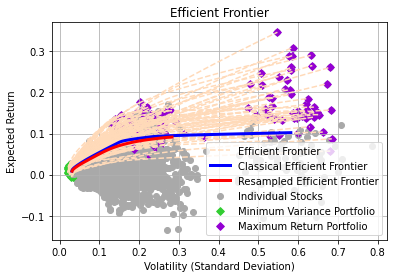

In [34]:
# Plot the classical and resampled efficient frontiers
axC = plt.gca()
plt.rcParams['figure.figsize'] = [10, 8]

for i in range(repetition):
    # Plot volatility versus expected return for individual stocks
    axC.scatter(x=np.sqrt(np.diag(Q_resample_list[i])), y=mu_resample_list[i], color='darkgray', label='Individual Stocks' if i == 0 else "")
    
    # Plot volatility versus expected return for mimimum variance portfolio
    axC.scatter(x=np.sqrt(var_minVar_list[i]), y=ret_minVar_list[i], marker='D', s=30,  color='limegreen', label='Minimum Variance Portfolio' if i == 0 else "")

    # Plot volatility versus expected return for maximum return portfolio
    axC.scatter(x=np.sqrt(var_maxRet_list[i]), y=ret_maxRet_list[i],  marker='D', s=30, color='darkviolet', label='Maximum Return Portfolio' if i == 0 else "")

    # Plot efficient frontier
    axC.plot(np.sqrt(var_frontC_list[i]), ret_frontC_list[i], '--', color='peachpuff', label='Efficient Frontier' if i == 0 else "")

#Plot the classical mean-variance efficient frontier
axC.plot(np.sqrt(var_front_clas), ret_front_clas, color='blue', linewidth=3, label='Classical Efficient Frontier')

#Plot the resampled efficient frontier
axC.plot(np.sqrt(var_frontC_resample), ret_frontC_resample, color='red', linewidth=3, label='Resampled Efficient Frontier')

axC.set_xlabel('Volatility (Standard Deviation)')
axC.set_ylabel('Expected Return')
plt.title('Efficient Frontier')
axC.legend(loc="lower right")
axC.grid()
plt.show()


4. Plot the portfolio compositions for classical and resampled frontiers.

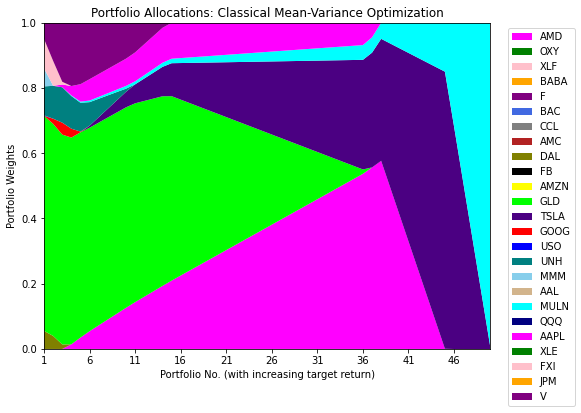

In [35]:
# Plot the portfolio compositions for classical frontiers
x_tick = np.arange(len(targetRet))+1
color_list = ['fuchsia','green','pink','orange','purple','royalblue','grey','firebrick','olive','black','yellow','lime','indigo','red','blue','teal','skyblue','tan','cyan','navy']
plt.figure(figsize=(8,6))
plt.stackplot(x_tick, np.array(w_front_clas).T, colors=color_list)
plt.legend(df1.columns[1:], bbox_to_anchor=(1.2, 1))
plt.xlim((1,len(targetRet)))
plt.ylim((0,1))
plt.xticks(np.arange(1,len(targetRet)+1,5))
plt.xlabel("Portfolio No. (with increasing target return)")
plt.ylabel("Portfolio Weights")
plt.title("Portfolio Allocations: Classical Mean-Variance Optimization")
plt.show()

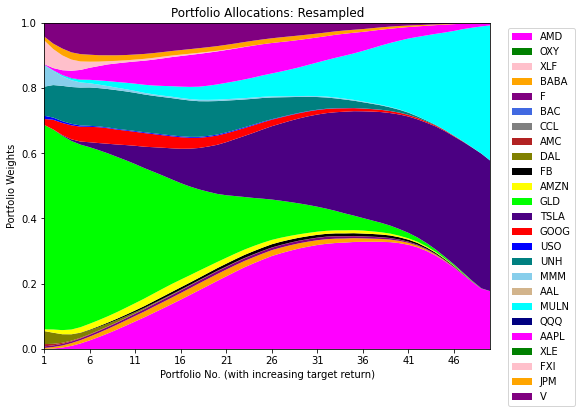

In [36]:
# Plot the portfolio compositions for resampled frontiers
x_tick = np.arange(len(targetRet))+1
color_list = ['fuchsia','green','pink','orange','purple','royalblue','grey','firebrick','olive','black','yellow','lime','indigo','red','blue','teal','skyblue','tan','cyan','navy']
plt.figure(figsize=(8,6))
plt.stackplot(x_tick, np.array(average_weight_list).T, colors=color_list)
plt.legend(df1.columns[1:], bbox_to_anchor=(1.2, 1))
plt.xlim((1,len(targetRet)))
plt.ylim((0,1))
plt.xticks(np.arange(1,len(targetRet)+1,5))
plt.xlabel("Portfolio No. (with increasing target return)")
plt.ylabel("Portfolio Weights")
plt.title("Portfolio Allocations: Resampled")
plt.show()

5. Discuss your findings from comparing the performance of all 6 portfolios and from observing the
graphs from questions 3 & 4.

Response to question 5 is in the report.